# Forecasting the Sales of a Furniture store
We are using Superstore sales data for furniture sales between 2014 to 2017 and apply a simple model to forecast for 2018

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
4. **[Visualizing Furniture Sales Time Series Data](#exploratory_data_analysis)**
    - 4.1 - [Checking Stationarity](#Checking_Stationarity)
5. **[Forcasting](#modeling)**
    - 5.1 - [Decomposing](#decomposing)
    - 5.2 - [Time Series Forecasting using ARIMA](#Time_Series_Forecasting_using_ARIMA)
    - 5.3 - [Parameter Selection](#Parameter_Selection)
    - 5.4 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.5 - [Validating Forecasts](#Validating_Forecasts)
    - 5.6 - [Visualizing the Forecast](#Visualizing_the_Forecast)

<a id='import_packages'></a>
# Import Packages

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

<a id='load_data'></a>
# Load Data

In [2]:
import os
import pandas as pd

furniture = pd.read_csv('SuperStore.csv', encoding='latin1')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
furniture.shape

(2121, 21)

In [3]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [3]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


<Axes: >

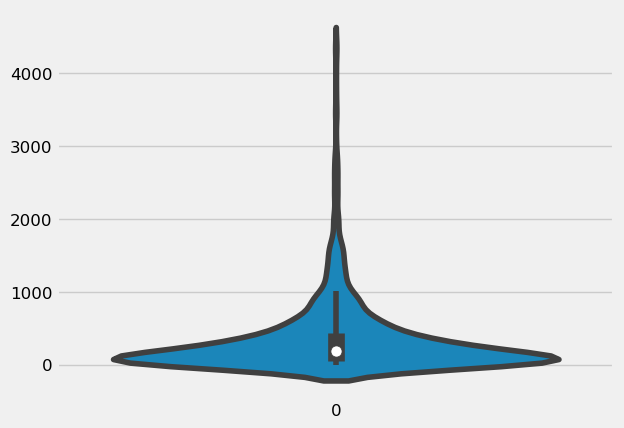

In [4]:
import seaborn as sns
sns.violinplot(furniture.Sales)

### Working with datetime data
- parsing
- formatting
- comparing
- sorting
- arithmetic

In [5]:
import datetime

In [6]:
date1 = '2020/02/14'
date2 = '2020/02/09'
date2 > date1

False

In [7]:
date1 = '14/02/2020'
date2 = '9/02/2020'
date2 > date1

True

In [11]:
format = '%Y/%m/%d'
date1 = datetime.datetime.strptime(date1, format)
date2 = datetime.datetime.strptime(date2, format)

In [12]:
date1

datetime.datetime(2020, 2, 14, 0, 0)

In [13]:
date1 > date2

True

In [17]:
dates = [date2, date1]

In [18]:
sorted(dates)

[datetime.datetime(2020, 2, 9, 0, 0), datetime.datetime(2020, 2, 14, 0, 0)]

In [14]:
date1 - date2

datetime.timedelta(days=5)

In [15]:
date1 + datetime.timedelta(days=16)

datetime.datetime(2020, 3, 1, 0, 0)

In [8]:
furniture['Order Date'].sort_values()

845      1/1/2017
1707     1/1/2017
1708     1/1/2017
179      1/1/2017
181     1/10/2014
          ...    
1524     9/9/2017
1152     9/9/2017
251      9/9/2017
250      9/9/2017
964      9/9/2017
Name: Order Date, Length: 2121, dtype: object

<a id='data_preparation'></a>
# Data Preparation

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [23]:
# Checking structure of the data
furniture.shape

(2121, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [24]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


<a id='check_data_type'></a>
## 3.3 Checking Data Type and Missing Values 

In [25]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [26]:
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
furniture.isnull().sum().sum()

0

Checking the furniture sales time stamp

In [27]:
furniture[furniture['Order Date'] == '1/1/2017']

,Order Date,Sales
179,1/1/2017,48.896
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744


In [9]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

We remove the columns that we do not need as well as check missing values

In [10]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture.head()
# furniture = furniture.sort_values('Order Date')
# furniture.isnull().sum()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


Aggregate sales data by date

In [28]:
furniture = furniture.groupby('Order Date')['Sales'].sum()
furniture = furniture.reset_index()
furniture.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


Indexing with the Time Series Data

In [11]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840


In [12]:
furniture['Order Date']

0      2016-11-08
1      2016-11-08
2      2015-10-11
3      2014-06-09
4      2014-06-09
          ...    
2116   2015-03-19
2117   2016-12-05
2118   2015-09-06
2119   2014-01-21
2120   2017-02-26
Name: Order Date, Length: 2121, dtype: datetime64[ns]

In [13]:
furniture.set_index('Order Date', inplace=True)
furniture.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [18]:
furniture.index.is_monotonic_increasing

True

In [17]:
furniture.sort_index(inplace=True)
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [19]:
furniture.index.min(), furniture.index.max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [33]:
furniture.index.max() - furniture.index.min()

Timedelta('1454 days 00:00:00')

<Axes: xlabel='Order Date'>

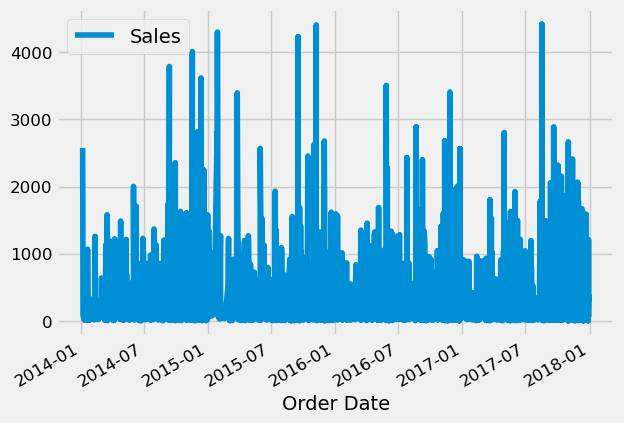

In [22]:
furniture.plot()

In [27]:
furniture.loc['2014-01']

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
2014-01-13,333.999
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470


In [20]:
len(furniture)

2121

In [37]:
furniture.loc['2014-01-07']

Sales    76.728
Name: 2014-01-07 00:00:00, dtype: float64

In [29]:
furniture[furniture.resample('D').mean().isna()]

,Sales
Order Date,
2014-01-06,NaN
2014-01-07,NaN
2014-01-10,NaN
2014-01-11,NaN
2014-01-13,NaN
...,...
2017-12-29,NaN
2017-12-29,NaN
2017-12-29,NaN


<Axes: xlabel='Order Date'>

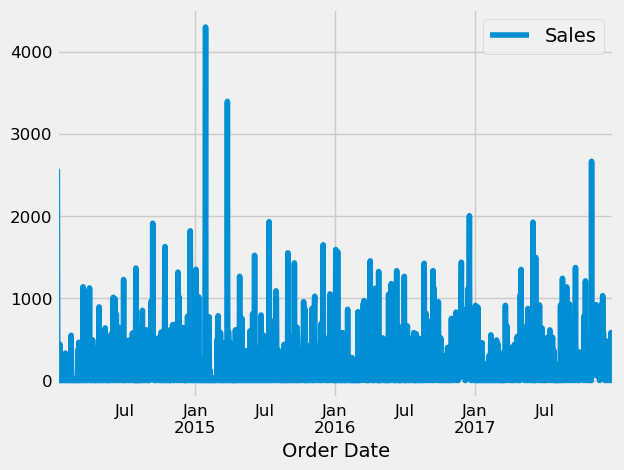

In [31]:
furniture.resample('D').mean().fillna(0).plot()

In [38]:
furniture.loc['2016-07':'2016-08']

,Sales
Order Date,
2016-07-02,723.6140
2016-07-04,1329.9650
2016-07-07,817.2780
2016-07-08,662.8800
2016-07-09,573.2860
2016-07-14,661.6860
2016-07-15,230.2800
2016-07-16,9.5520
2016-07-17,37.1700


<Axes: xlabel='Order Date'>

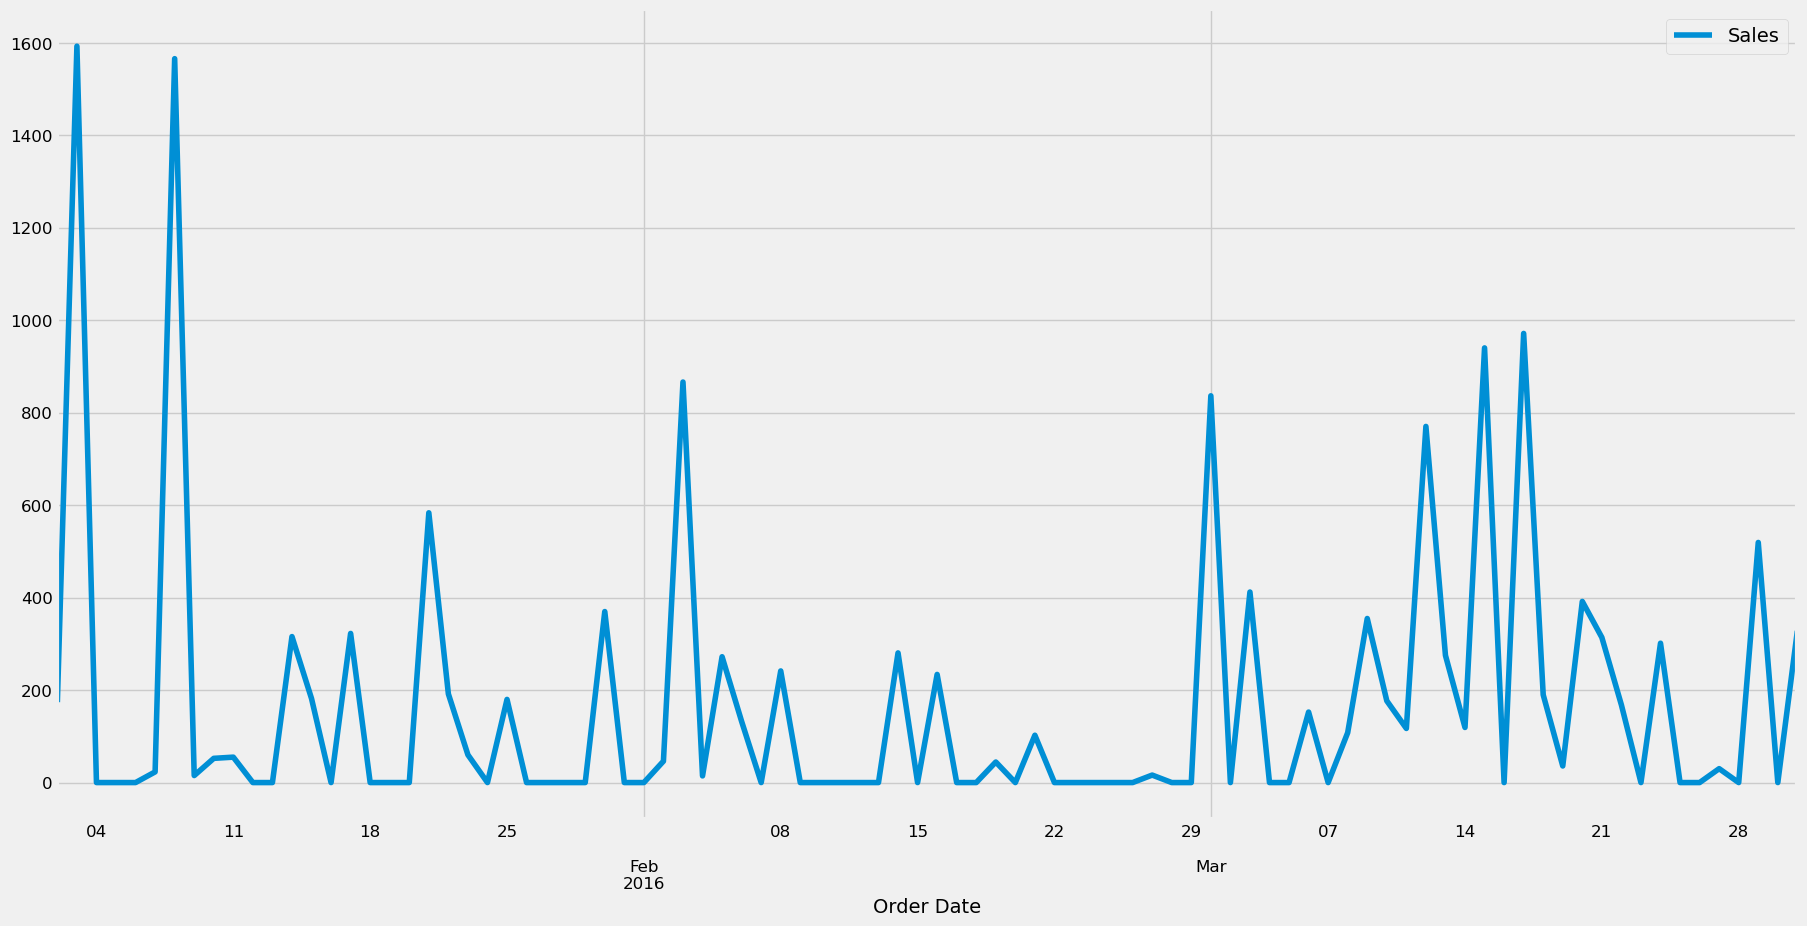

In [32]:
furniture.loc['2016-01':'2016-03'].resample('D').mean().fillna(0).plot(figsize=(20,10))

<Axes: xlabel='Order Date'>

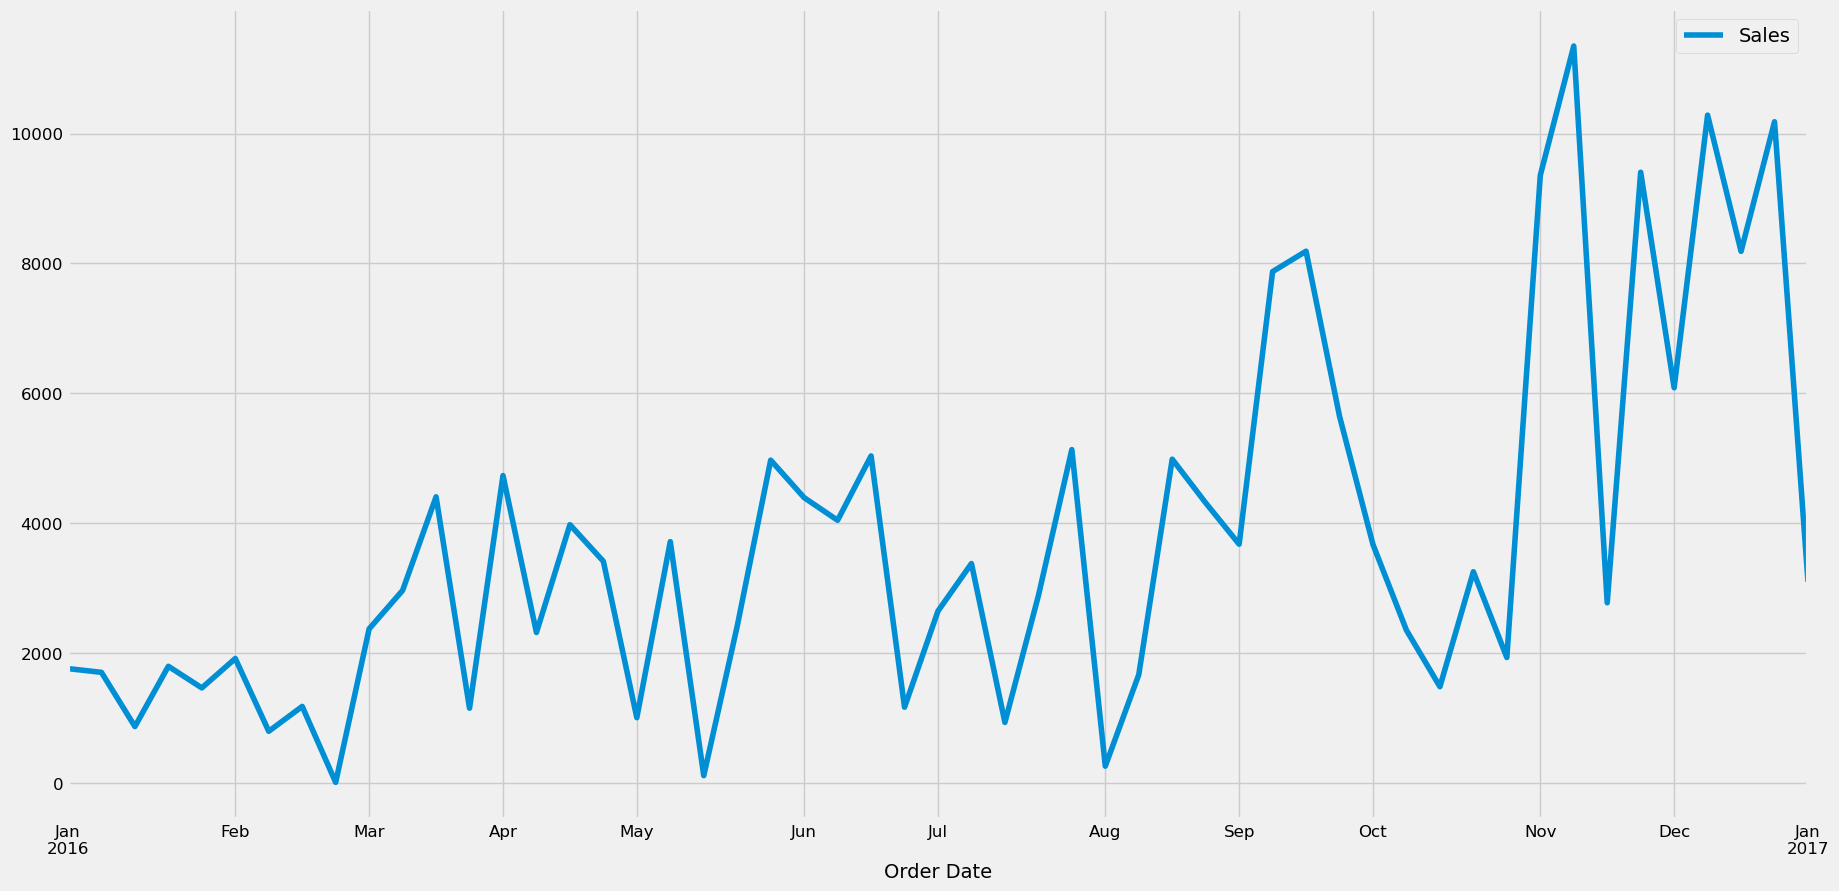

In [33]:
furniture.loc['2016'].resample('W').sum().fillna(0).plot(figsize=(20,10))

<Axes: xlabel='Order Date'>

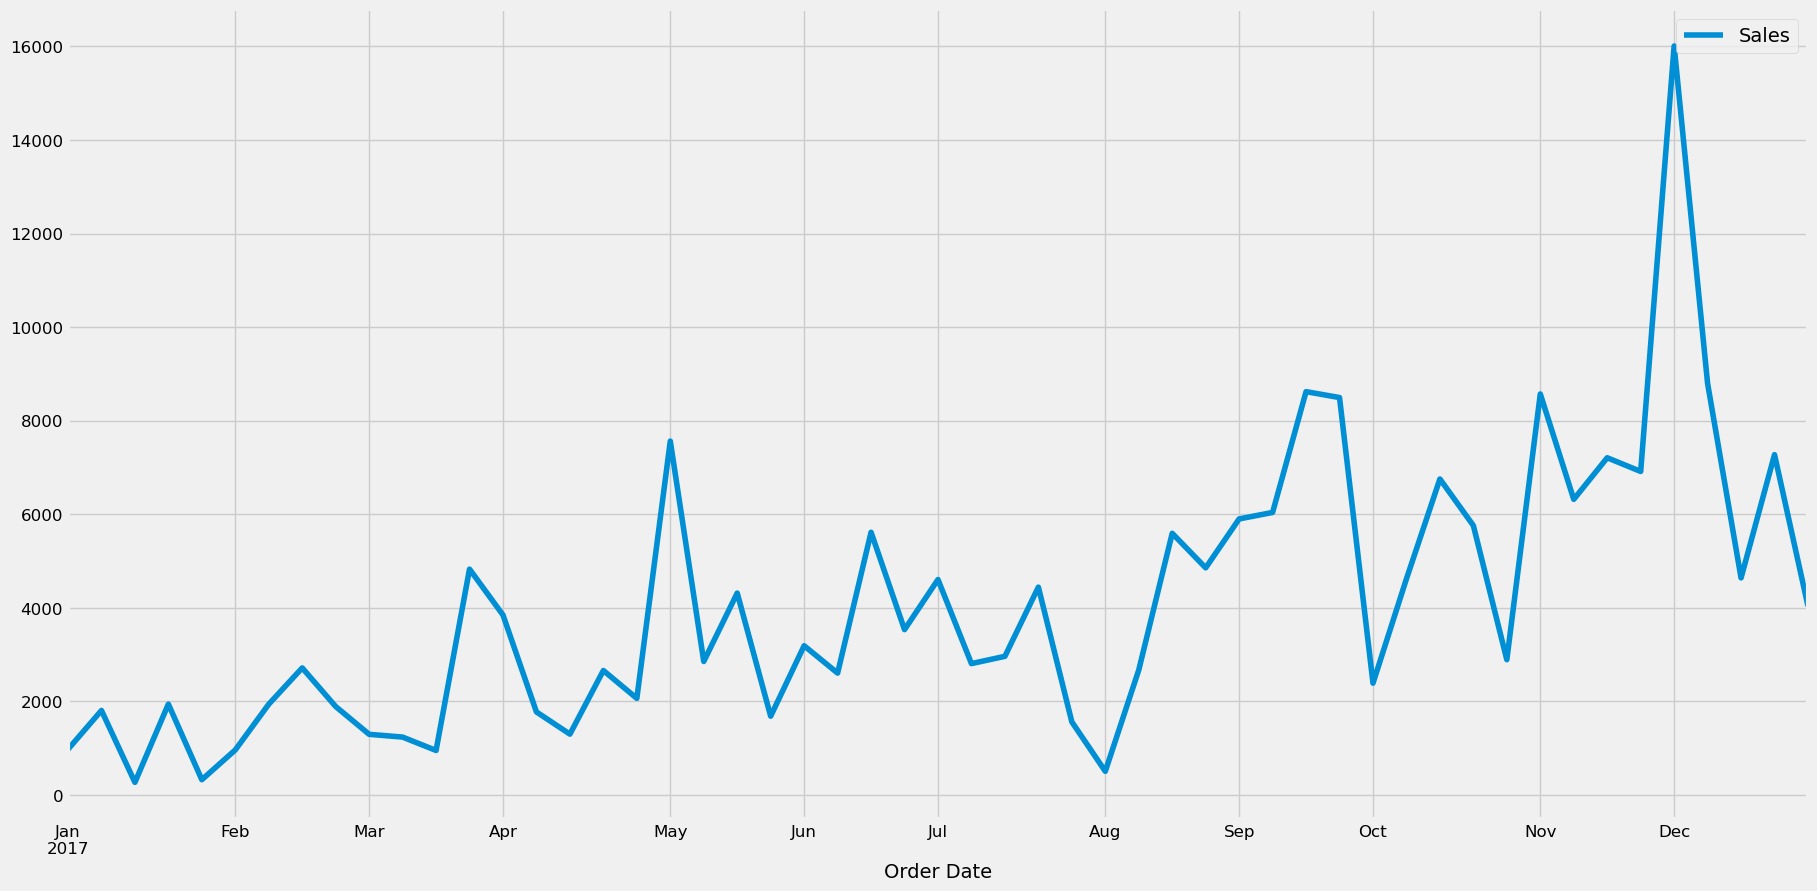

In [34]:
furniture.loc['2017'].resample('W').sum().fillna(0).plot(figsize=(20,10))

In [37]:
furniture.resample('M').sum()

48

<Axes: xlabel='Order Date'>

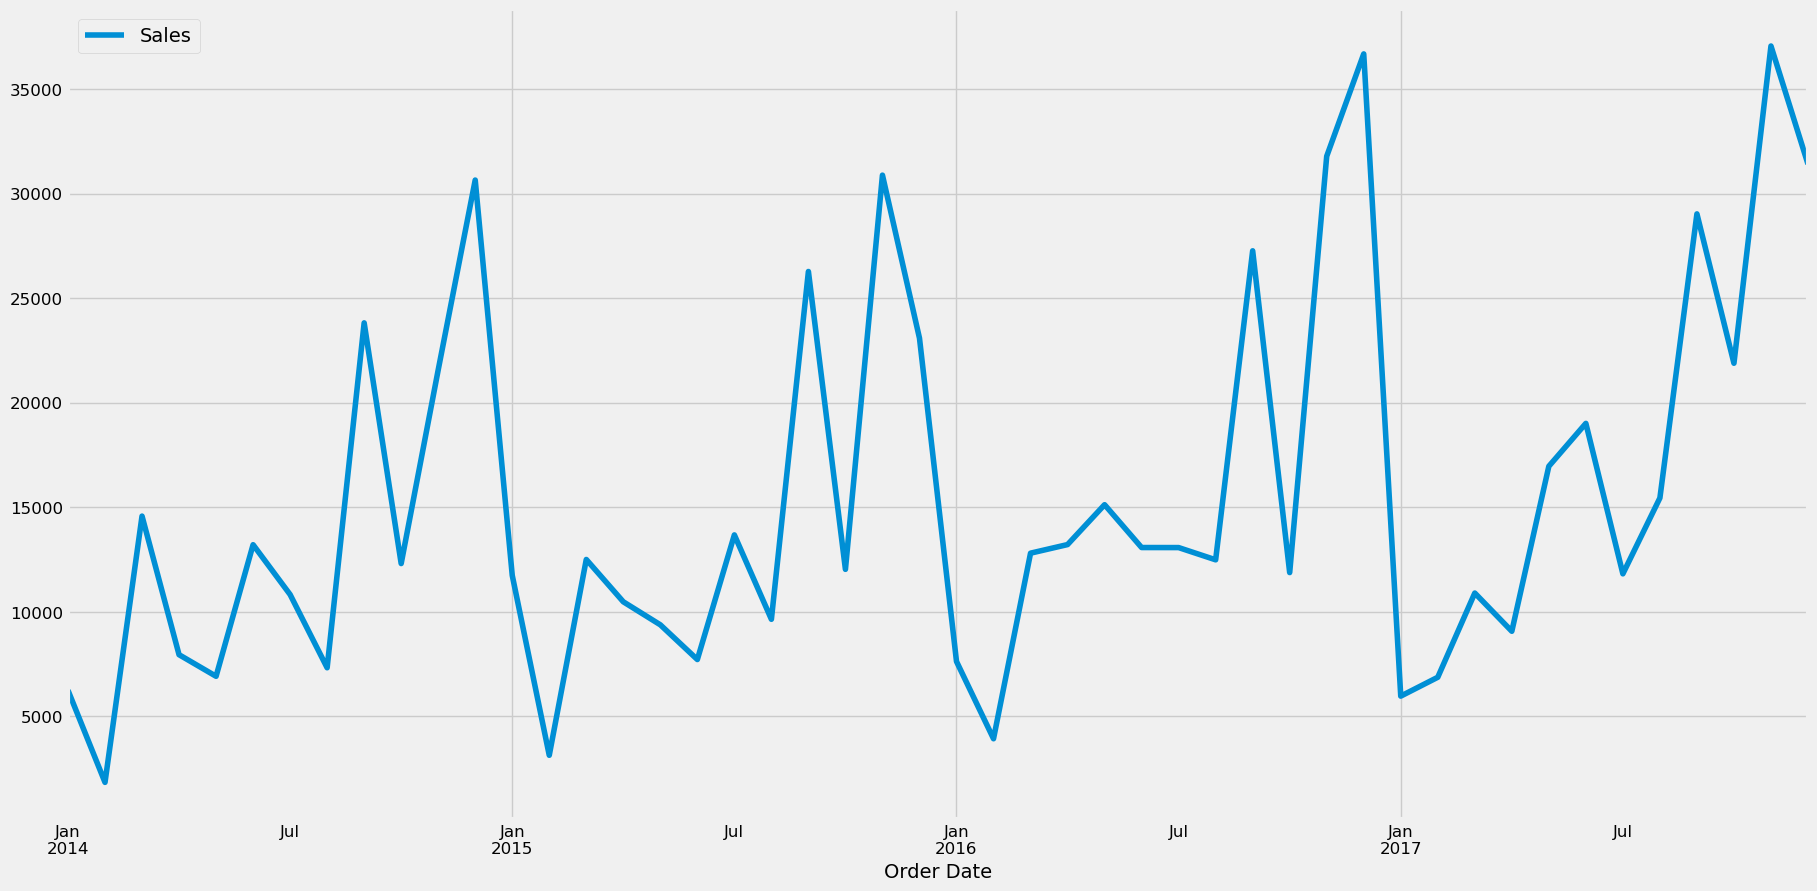

In [35]:
furniture.resample('M').sum().plot(figsize=(20,10))

Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky

In [39]:
y = furniture['Sales'].resample('MS').mean()
y

# Exercise: would day-wise data improve my forecast?
# y = furniture['Sales'].resample('D').ffill()

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014438
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [52]:
len(y)

48

Offset spec for resample() explained here

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [53]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

Taking a look at the furniture sales data for the year 2017

In [53]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<a id='exploratory_data_analysis'></a>
# Visualizing Furniture Sales Time Series Data

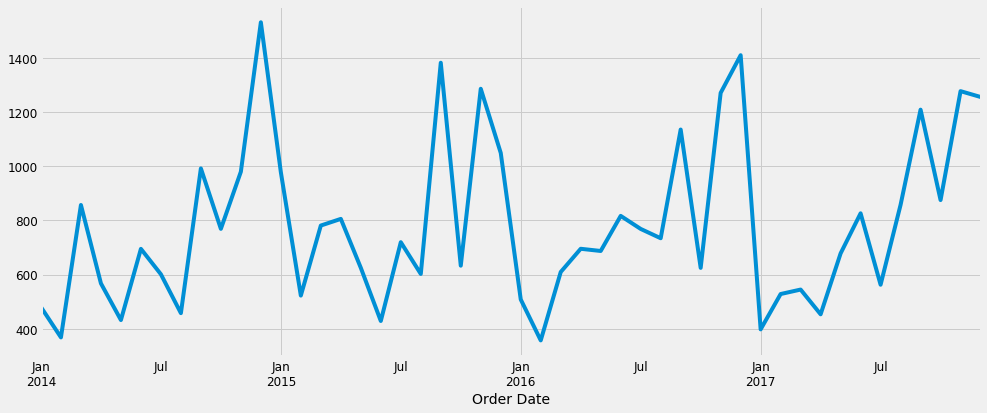

In [54]:
y.plot(figsize=(15, 6))
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year

<a id='Checking_Stationarity'></a>
# Checking Stationarity

Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). 
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

In [40]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
result

(-6.962405221214865,
 9.093398510006446e-10,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 446.50775372117755)

In [56]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [57]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


We can see that our statistic value is less than the value at the 1% level . This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

<a id='Decomposing'></a>
# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

In [ ]:
decomposition.

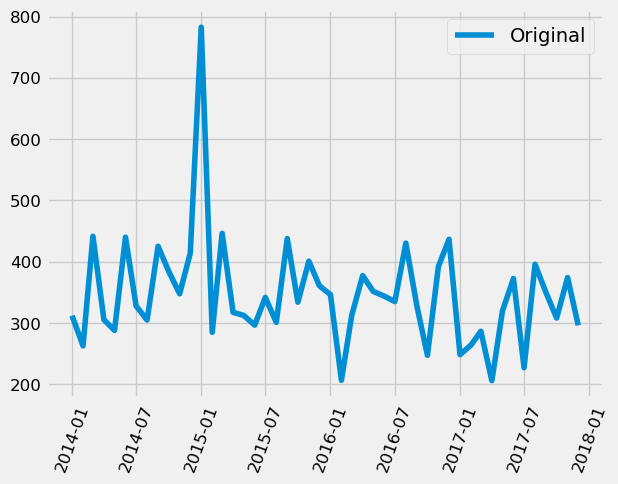

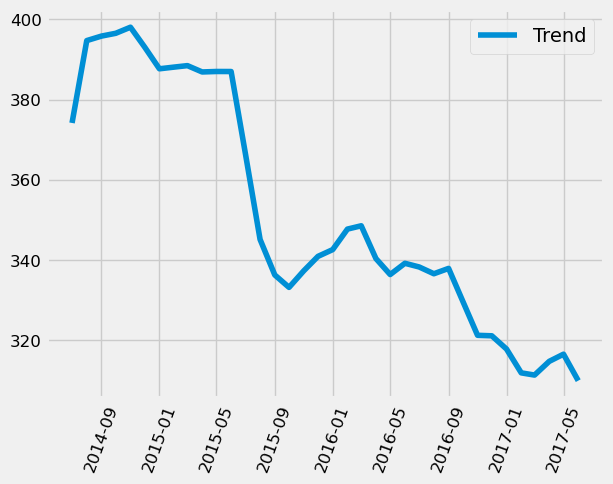

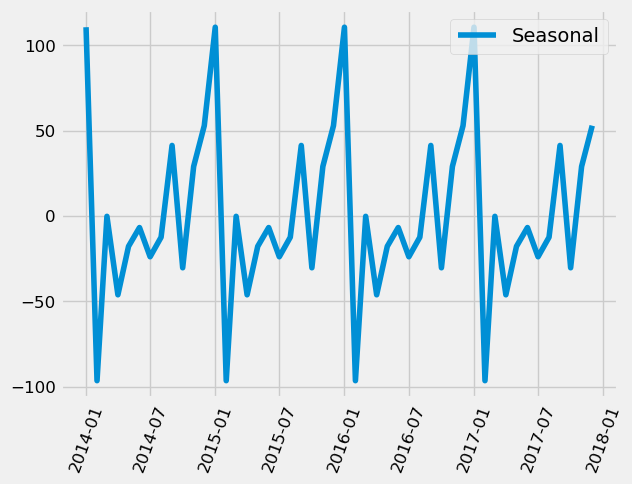

(array([16314., 16436., 16556., 16679., 16801., 16922., 17045., 17167.,
        17287.]),
 [Text(16314.0, 0, '2014-09'),
  Text(16436.0, 0, '2015-01'),
  Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05')])

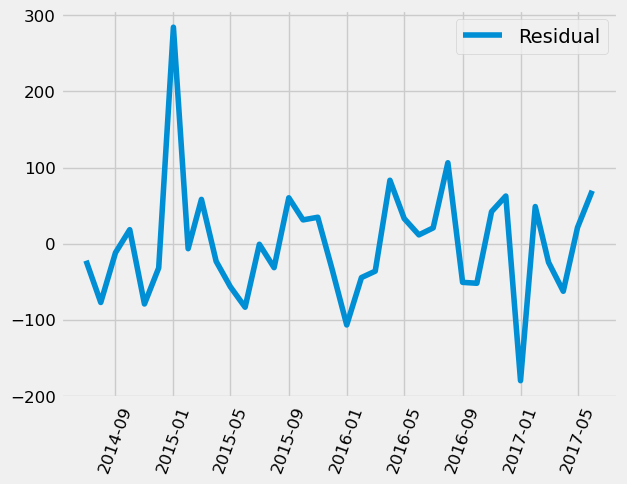

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')
plt.xticks(rotation=70)

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.xticks(rotation=70)

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.xticks(rotation=70)

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.xticks(rotation=70)

By visualizing the decomposed components of the original time series we can say that the sales of furniture is unstable, along with its obvious seasonality.

In [44]:
import seaborn as sns

<Axes: >

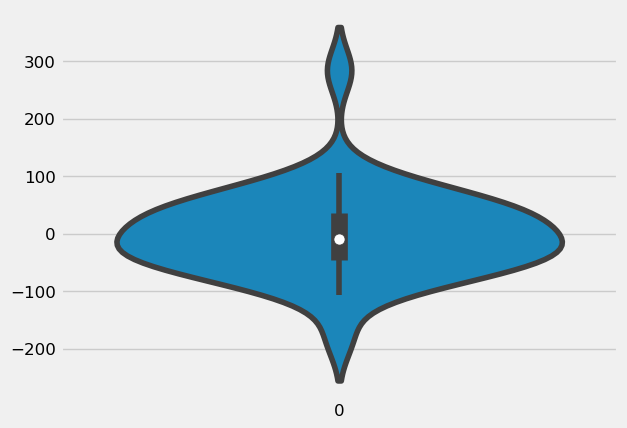

In [45]:
sns.violinplot(residual)

<Axes: xlabel='resid', ylabel='Density'>

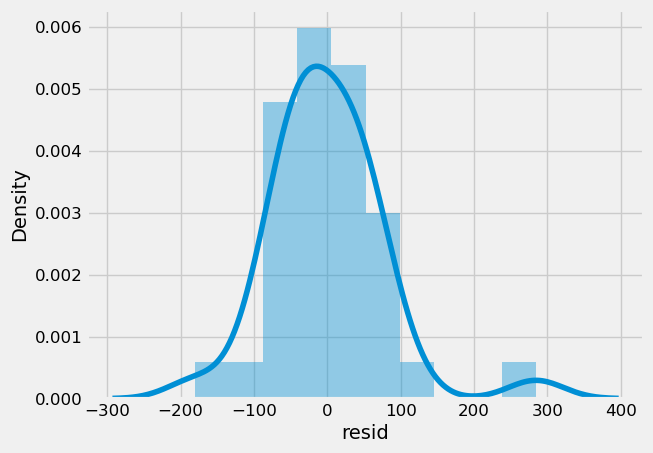

In [46]:
sns.distplot(residual)

<a id='Time_Series_Forcasting_using_ARIMA'></a>
# Time Series Forcasting using ARIMA
We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

ARIMA = Autoregressive integrated moving average

In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [48]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='Parameter_Selection'></a>
# Parameter Selection 
We use “grid search” to find the optimal set of parameters that yields the best performance for our model.

AIC = Akaike Information Critera (lower is better)

In [59]:
mod = sm.tsa.statespace.SARIMAX(y, order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = mod.fit(method='cg', maxiter=200)
print('ARIMA{}x{}12 - AIC:{}'.format((0,1,1), (1,0,1,12), results.aic))



Optimization terminated successfully.
         Current function value: 2.558773
         Iterations: 134
         Function evaluations: 372
         Gradient evaluations: 372
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:406.9938820318399


In [60]:
output = dict(param=0, param_seasonal=0, aic=99999)

from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
            results = mod.fit(method='cg', maxiter=200)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic<output['aic']:
                output['aic'] = results.aic
                output['param'] = param
                output['param_seasonal'] = param_seasonal
        except:
            continue

Optimization terminated successfully.
         Current function value: 7.206140
         Iterations: 6
         Function evaluations: 67
         Gradient evaluations: 67
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1152.2344633123944
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 9
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2568.906760893468
Optimization terminated successfully.
         Current function value: 4.422349
         Iterations: 6
         Function evaluations: 60
         Gradient evaluations: 60
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:706.5401142692185
Optimization terminated successfully.
         Current function value: 2.797437
         Iterations: 23
         Function evaluations: 59
         Gradient evaluations: 59
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:442.99570804667735
Optimization terminated successfully.
         Current function value: 4.675262
         Itera

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 2.673255
         Iterations: 200
         Function evaluations: 562
         Gradient evaluations: 562
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:549.4141459246486
Optimization terminated successfully.
         Current function value: 6.035446
         Iterations: 6
         Function evaluations: 61
         Gradient evaluations: 61
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1000.0288650941047
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 10
         Gradient evaluations: 10
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.2369615806547
Optimization terminated successfully.
         Current function value: 4.494353
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 75
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:729.0064049352648


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 2.824660
         Iterations: 58
         Function evaluations: 321
         Gradient evaluations: 321
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:275.23479423915006
Optimization terminated successfully.
         Current function value: 4.515213
         Iterations: 14
         Function evaluations: 52
         Gradient evaluations: 52
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:736.550333437573
         Current function value: 4.166596
         Iterations: 200
         Function evaluations: 558
         Gradient evaluations: 558
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:432.9756438712077
Optimization terminated successfully.
         Current function value: 3.026939
         Iterations: 19
         Function evaluations: 74
         Gradient evaluations: 74
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:486.9631486984656


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 2.813726
         Iterations: 23
         Function evaluations: 53
         Gradient evaluations: 53
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:392.38851383657084
Optimization terminated successfully.
         Current function value: 5.571935
         Iterations: 33
         Function evaluations: 136
         Gradient evaluations: 136
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:888.0202923305643
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 10
         Gradient evaluations: 10
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2467.2341694662623
Optimization terminated successfully.
         Current function value: 4.259091
         Iterations: 37
         Function evaluations: 152
         Gradient evaluations: 152
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:670.3928780942238
Optimization terminated successfully.
         Current function value: 2.558773
      

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 3.815404
         Iterations: 131
         Function evaluations: 256
         Gradient evaluations: 256
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:605.4706629144026
Optimization terminated successfully.
         Current function value: 2.787382
         Iterations: 186
         Function evaluations: 497
         Gradient evaluations: 497
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:444.44633369115746
         Current function value: 2.558161
         Iterations: 200
         Function evaluations: 458
         Gradient evaluations: 458
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:326.86812707933353
Optimization terminated successfully.
         Current function value: 6.132996
         Iterations: 19
         Function evaluations: 72
         Gradient evaluations: 72
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1001.8911104465199
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Funct

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 116
         Function evaluations: 291
         Gradient evaluations: 291
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:353.4883732325821
Optimization terminated successfully.
         Current function value: 4.326742
         Iterations: 123
         Function evaluations: 255
         Gradient evaluations: 255
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:717.5216980602088
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 10
         Gradient evaluations: 10
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2585.3254042490694
Optimization terminated successfully.
         Current function value: 2.791555
         Iterations: 33
         Function evaluations: 63
         Gradient evaluations: 63
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:461.81264525440645
         Current function value: 2.788583
         Iterations: 200
         Functio

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 4.297947
         Iterations: 43
         Function evaluations: 115
         Gradient evaluations: 113
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:632.4530507634307
Optimization terminated successfully.
         Current function value: 2.671984
         Iterations: 41
         Function evaluations: 138
         Gradient evaluations: 138
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:383.4733146213398
         Current function value: 4.321715
         Iterations: 200
         Function evaluations: 420
         Gradient evaluations: 420
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:596.9203474947882
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 10
         Gradient evaluations: 10
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2488.684423200467


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 2.788567
         Iterations: 66
         Function evaluations: 132
         Gradient evaluations: 132
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:364.9196675602826
Optimization terminated successfully.
         Current function value: 2.672162
         Iterations: 51
         Function evaluations: 110
         Gradient evaluations: 110
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:348.2356022398166
Optimization terminated successfully.
         Current function value: 5.859915
         Iterations: 22
         Function evaluations: 81
         Gradient evaluations: 81
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:955.8824579873444
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 10
         Gradient evaluations: 10
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2596.0838876447465
Optimization terminated successfully.
         Current function value: 4.441696
       

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 2.776060
         Iterations: 155
         Function evaluations: 340
         Gradient evaluations: 340
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:396.2106493158257
         Current function value: 2.661372
         Iterations: 200
         Function evaluations: 404
         Gradient evaluations: 404
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:347.51547987014374


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
output

{'param': (0, 0, 1), 'param_seasonal': (0, 1, 1, 12), 'aic': 271.8298924352939}

<a id='Fitting_the_ARIMA'></a>
# Fitting the ARIMA model

In [78]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(method='cg', maxiter=200)
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 2.672379
         Iterations: 160
         Function evaluations: 554
         Gradient evaluations: 554
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0171      0.803     -0.021      0.983      -1.591       1.556
ma.S.L12     -47.9422    968.242     -0.050      0.961   -1945.662    1849.777
sigma2         8.7311    352.599      0.025      0.980    -682.351     699.813


In [79]:
results.aic

271.8298924352939

In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -344.071
Date:                            Wed, 28 Aug 2024   AIC                            694.142
Time:                                    06:23:55   BIC                            698.893
Sample:                                01-01-2014   HQIC                           695.800
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0685    130.908      0.001      1.000    -256.507     256.644
ma.S.L12      -1.9740      0.350     -5.640      0.000      -2.660      -1.288
sigma2      7.976e+06   3.52e-06   2.26e+12      0.000    7.98e+06    7.98e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                51.66
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+32. Standard errors may be unstable.
"""

Running model diagnostiscs to check any unusual behaviour

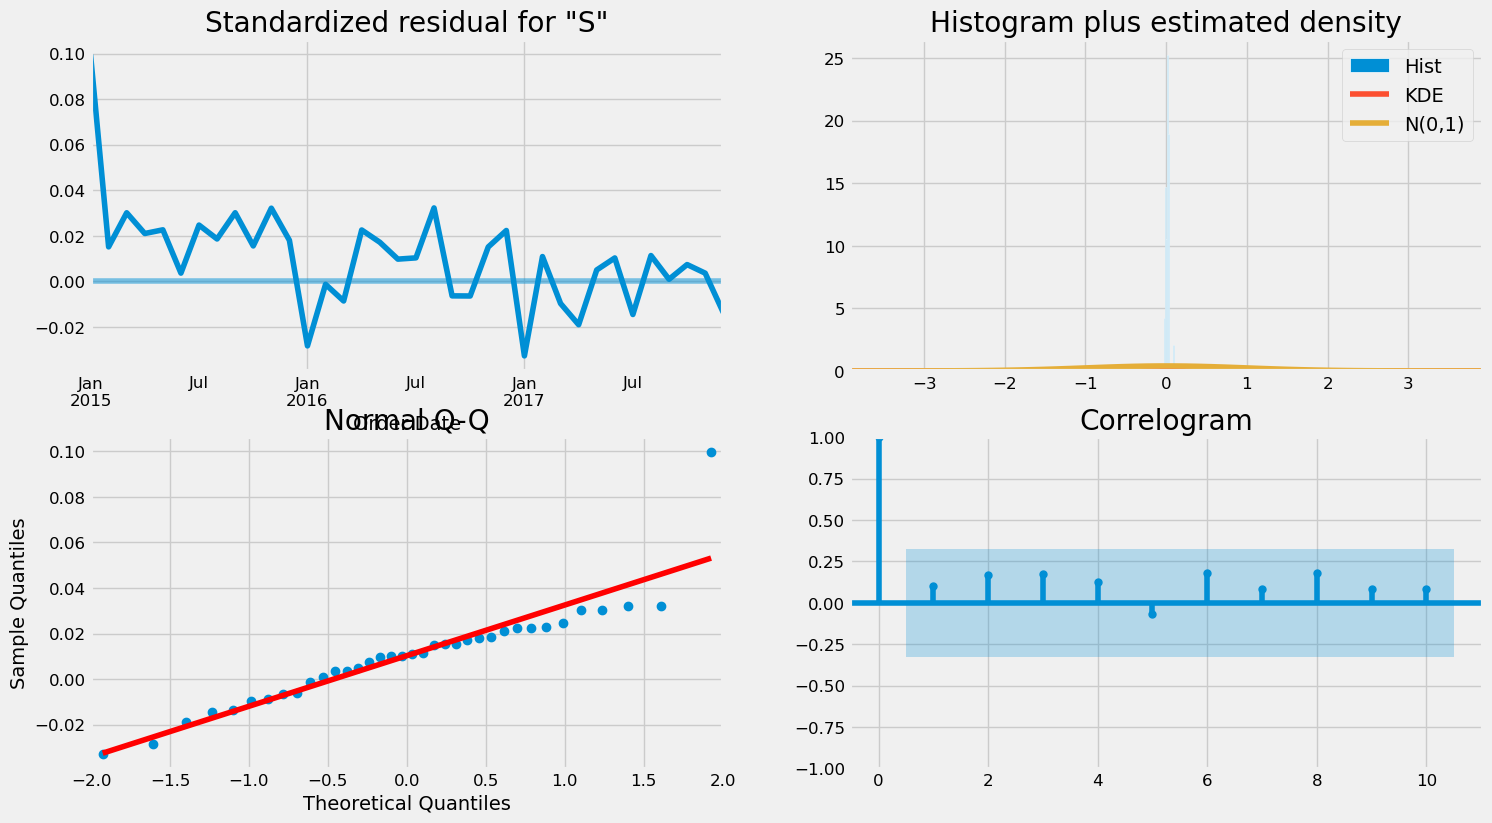

In [69]:
results.plot_diagnostics(figsize=(16, 9))
plt.show()

The model diagnostics indicates that the model residuals are near normally distributed

# u98106@gmail.com

# Validating Forecasts
We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

In [70]:
y.loc['2017']

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

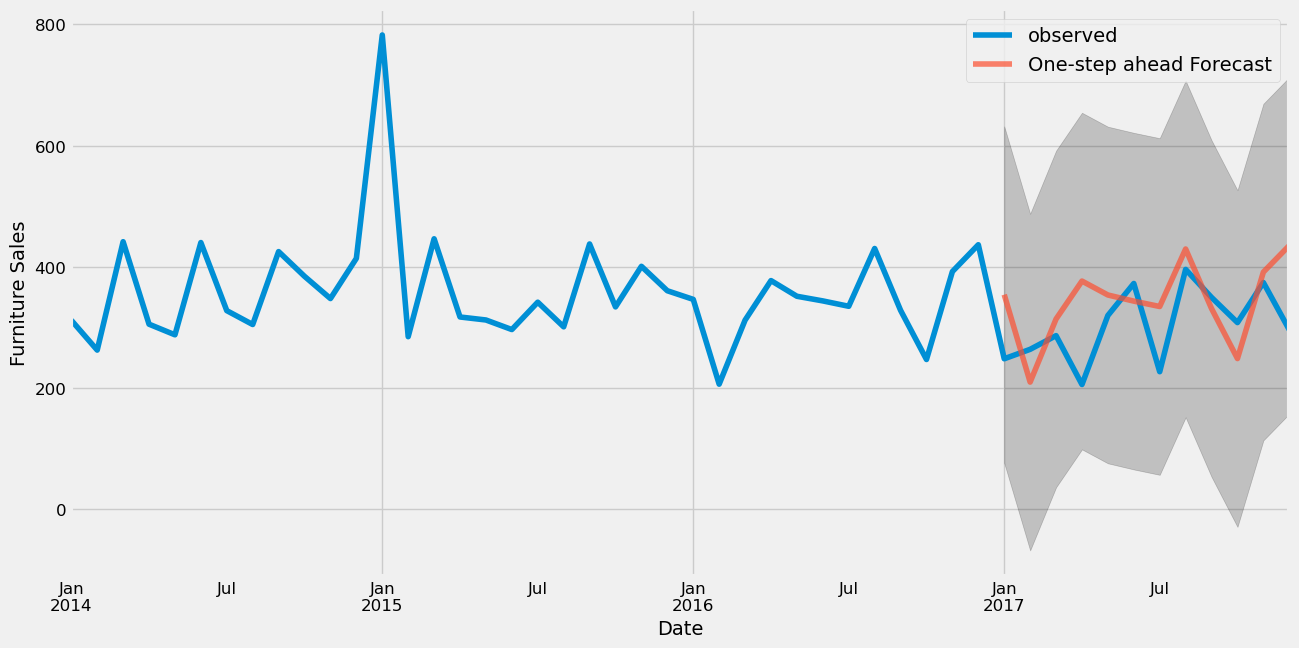

In [81]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, 
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [82]:
pred.predicted_mean

Order Date
2017-01-01    354.299387
2017-02-01    210.053199
2017-03-01    314.093283
2017-04-01    376.700404
2017-05-01    353.720286
2017-06-01    343.617301
2017-07-01    334.726928
2017-08-01    429.604123
2017-09-01    331.321668
2017-10-01    248.860832
2017-11-01    391.531111
2017-12-01    435.385626
Freq: MS, Name: predicted_mean, dtype: float64

In [83]:
predicted = pred.conf_int()

In [84]:
predicted['mean'] = pred.predicted_mean

In [85]:
predicted['interval'] = predicted['upper Sales']-predicted['lower Sales']

In [86]:
predicted

,lower Sales,upper Sales,mean,interval
Order Date,,,,
2017-01-01,76.647844,631.950930,354.299387,555.303086
2017-02-01,-67.598344,487.704742,210.053199,555.303086
2017-03-01,36.441766,591.744801,314.093283,555.303034
2017-04-01,99.048887,654.351922,376.700404,555.303034
2017-05-01,76.068769,631.371803,353.720286,555.303034
2017-06-01,65.965783,621.268818,343.617301,555.303034
2017-07-01,57.075411,612.378446,334.726928,555.303034
2017-08-01,151.952606,707.255640,429.604123,555.303034
2017-09-01,53.670151,608.973185,331.321668,555.303034


The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

# Calculating MSE and RMSE

In [87]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 6848.5
The Root Mean Squared Error of our forecasts is 82.76


MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales.

# Visualizing the Forecast 

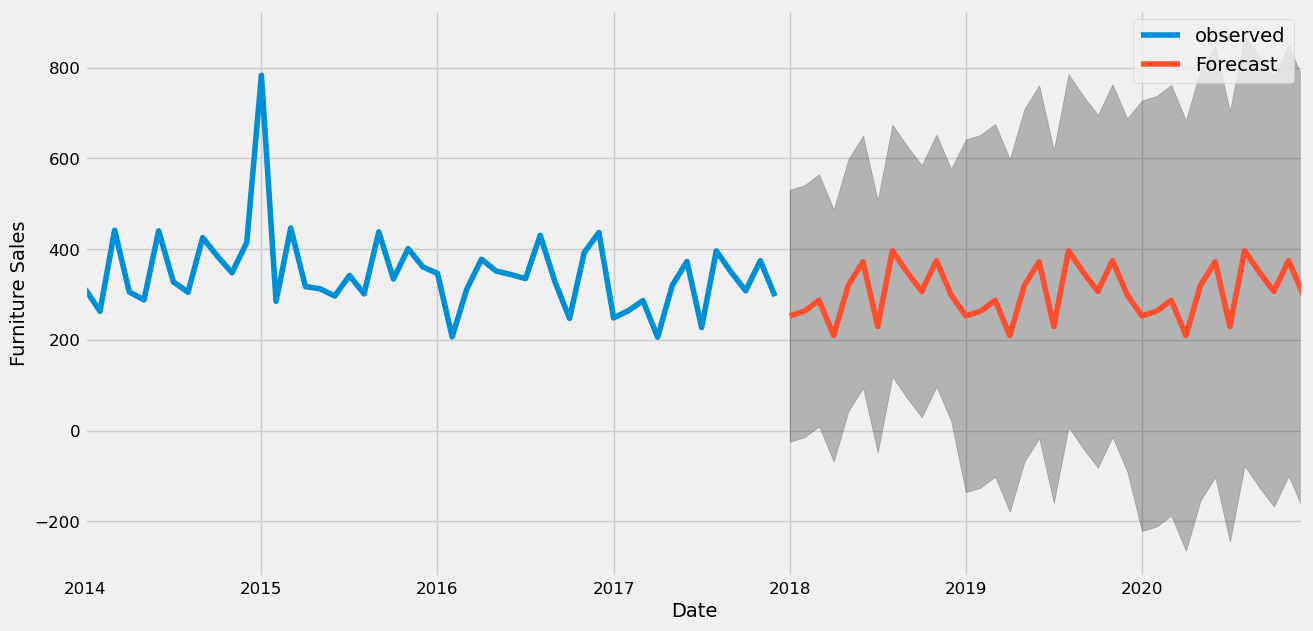

In [88]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
# print(pred_ci)
plt.legend()
plt.show()

# Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.